In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, BasicAer, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
#################################################################################
# Subroutine   : two bit Comparator',
#           a and b are the input, and two ancilla an1,an2 
#################################################################################
def qccomparator(qcir,a,b,an1,an2):
    
    qcir.cx(a,an1)
    qcir.cx(b,an1)
    qcir.x(b)
    qcir.ccx(a,b,an2)
    qcir.x(an1)
    qcir.x(b)

In [3]:
#################################################################################
# Subroutine   : CCCNOT,
#           a,b and c are the input, and two ancilla an1,an2
#################################################################################
def CCCNOT(qcir,a,b,c,an1,an2):
    qcir.ccx(a,b,an1)
    qcir.ccx(an1,c,an2)

In [4]:
inp1 = input("Enter 3 digit binary number:")
inp2 = input("Enter 3 digit binary number:")
N = len(inp1)
qdata1=QuantumRegister(N)
qdata2=QuantumRegister(N)
an1=QuantumRegister(N)
an2=QuantumRegister(N)
cccnotan=QuantumRegister(2)
Fan1=QuantumRegister(2)
cRM1 = ClassicalRegister(1)
#cRM1 = ClassicalRegister(N)
cRM2 = ClassicalRegister(N)

Enter 3 digit binary number:100
Enter 3 digit binary number:101


In [5]:
qCircuit = QuantumCircuit(qdata1, qdata2, an1,an2,cccnotan,Fan1, cRM1,cRM2)

In [6]:
#formation of input
for i in range (N):
    if inp1[i] == "1":
        qCircuit.x(qdata1[i])    
#formation of input
for i in range (N):
    if inp2[i] == "1":
        qCircuit.x(qdata2[i])
#formation of Circuit
for i in range(N):
    qccomparator(qCircuit,qdata1[i],qdata2[i],an1[i],an2[i])

In [7]:
CCCNOT(qCircuit,an1[0],an1[1],an1[2],cccnotan[0],Fan1[0])
qCircuit.cx(an2[2],Fan1[1])
qCircuit.ccx(an1[1],an1[2],Fan1[1])
CCCNOT(qCircuit,an2[0],an1[1],an1[2],cccnotan[1],Fan1[1])
# Swap opeation will go here if Fan1[1]=1 (swap will work ) else no swap

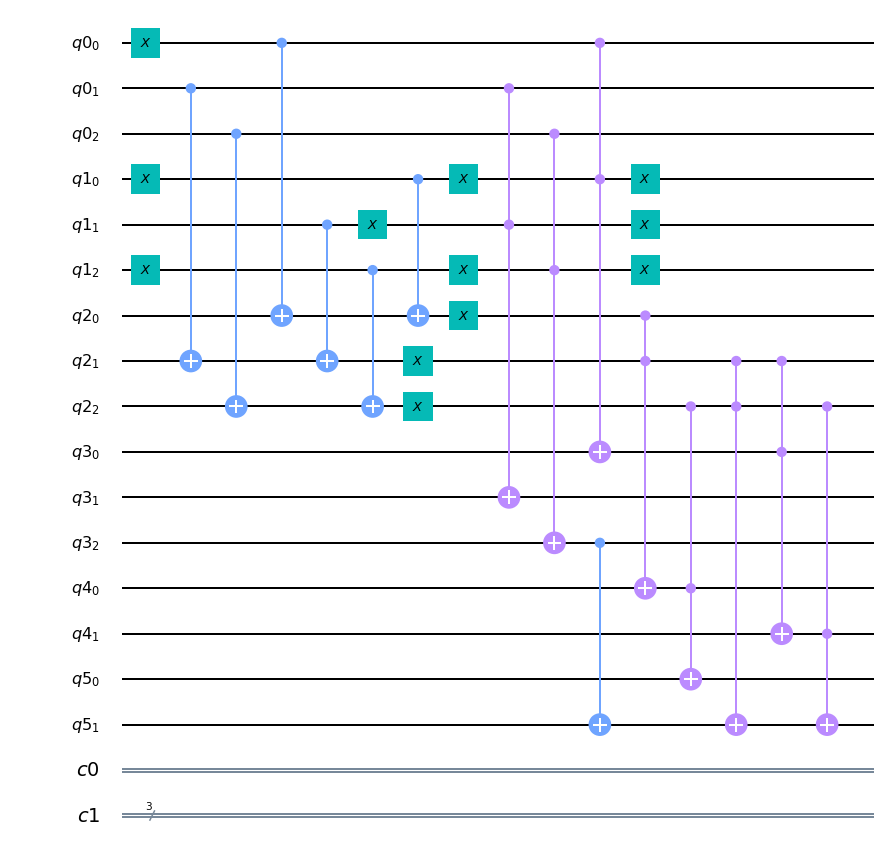

In [8]:
qCircuit.draw(output='mpl')

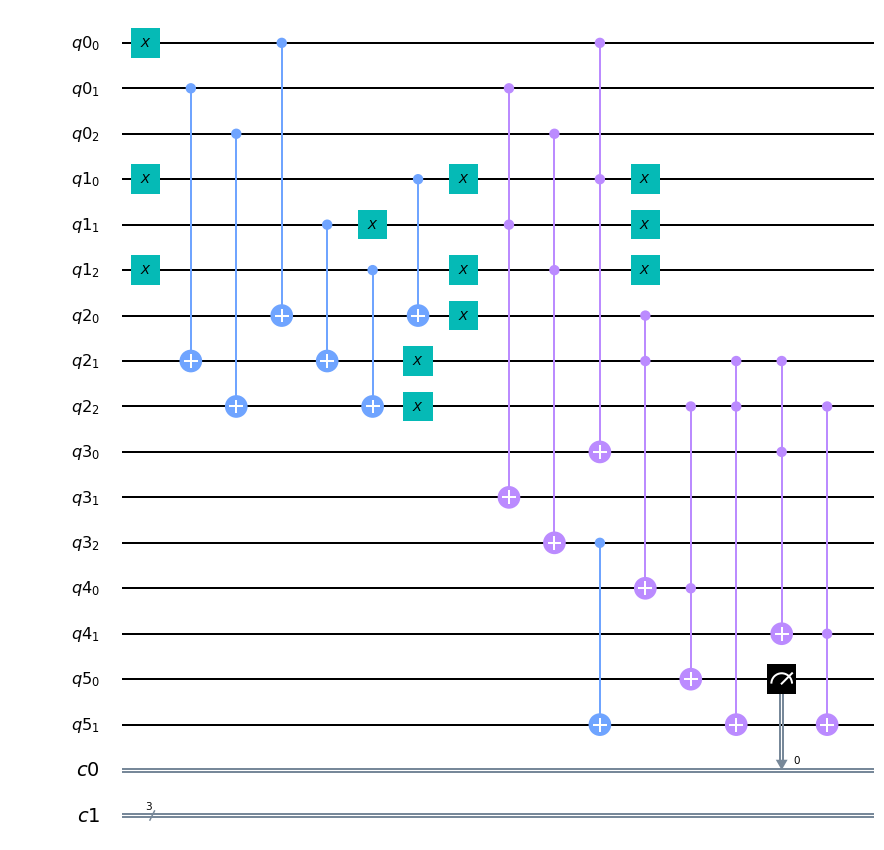

In [9]:
#qCircuit.measure(qdata1, cRM1)
#qCircuit.measure(qdata2, cRM2)
qCircuit.measure(Fan1[0], cRM1)
qCircuit.draw(output='mpl')


In [10]:
backend_sim = Aer.get_backend('qasm_simulator')
result = execute(qCircuit, backend=backend_sim).result()

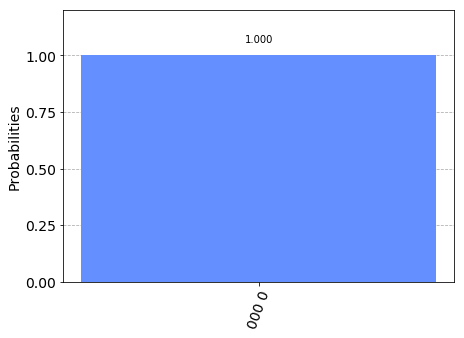

In [12]:

plot_histogram(result.get_counts(qCircuit))